## Problema: Dataset de pingüinos

Nombre: Mario José Félix Rojas 

CC: 1017261080

Carga el siguiente dataset y responde las siguientes preguntas:

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Cargar el dataset de pingüinos:
df = sns.load_dataset("penguins")

### Primera aproximación a los datos de forma general y su limpieza:

In [67]:
# Primera observación del Data set:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [68]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Desde el análisis de las tres líneas de código anterior, se tienen 344 datos, dentro de los cuales hay variables que presentan datos nulos o NaN. Hay siete características, especias, islas, tres variables de longitud en milimetros, las cuales son, el largo del pico, profundidad del pico y el largo de la aleta, las demás son: la masa del cuerpo y el sexo.

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [70]:
species_unique = df['species'].unique()
species_unique

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Hay tres especies de pingüinos.

In [71]:
df.groupby('species').describe().T

species                       Adelie    Chinstrap       Gentoo
bill_length_mm    count   151.000000    68.000000   123.000000
                  mean     38.791391    48.833824    47.504878
                  std       2.663405     3.339256     3.081857
                  min      32.100000    40.900000    40.900000
                  25%      36.750000    46.350000    45.300000
                  50%      38.800000    49.550000    47.300000
                  75%      40.750000    51.075000    49.550000
                  max      46.000000    58.000000    59.600000
bill_depth_mm     count   151.000000    68.000000   123.000000
                  mean     18.346358    18.420588    14.982114
                  std       1.216650     1.135395     0.981220
                  min      15.500000    16.400000    13.100000
                  25%      17.500000    17.500000    14.200000
                  50%      18.400000    18.450000    15.000000
                  75%      19.000000    19.400000    15.700000
                  max      21.500000    20.800000    17.300000
flipper_length_mm count   151.000000    68.000000   123.000000
                  mean    189.953642   195.823529   217.186992
                  std       6.539457     7.131894     6.484976
                  min     172.000000   178.000000   203.000000
                  25%     186.000000   191.000000   212.000000
                  50%     190.000000   196.000000   216.000000
                  75%     195.000000   201.000000   221.000000
                  max     210.000000   212.000000   231.000000
body_mass_g       count   151.000000    68.000000   123.000000
                  mean   3700.662252  3733.088235  5076.016260
                  std     458.566126   384.335081   504.116237
                  min    2850.000000  2700.000000  3950.000000
                  25%    3350.000000  3487.500000  4700.000000
                  50%    3700.000000  3700.000000  5000.000000
                  75%    4000.000000  3950.000000  5500.000000
                  max    4775.000000  4800.000000  6300.000000

Dentro de las características que tiene cada especie, se tienen las tres longitudes y la masa del cuerpo de cada pingüino.

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.


Lo primero es saber, si es posible, cuantos datos faltan, una vez se sepa esto, se creará una copia de dataframe y sobre esta copia se realizará la limpieza, usando dropna, con el fin de quitar estos datos faltantes.

In [72]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Con respecto a lo anterior, la mayoría de los datos faltantes se encuentran en la variable de sexo, mientras que en la masa y en las longitudes faltan 2 datos por cada una.

In [73]:
df_copy = df.copy().dropna()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

Para presentar esta cantidad se desplegará mediante un diagrama de frecuencias.

In [74]:
df_copy.groupby('island')['species'].count()

island
Biscoe       163
Dream        123
Torgersen     47
Name: species, dtype: int64

Por lo que la isla con mayor número de especies de pingüinos es Biscoe con 163 especies, seguida por Dream con 123 especies y por último Torgersen con 47 especies.

<Axes: title={'center': 'Cantidad de especies por isla'}, xlabel='Isla', ylabel='Cantidad de especies'>

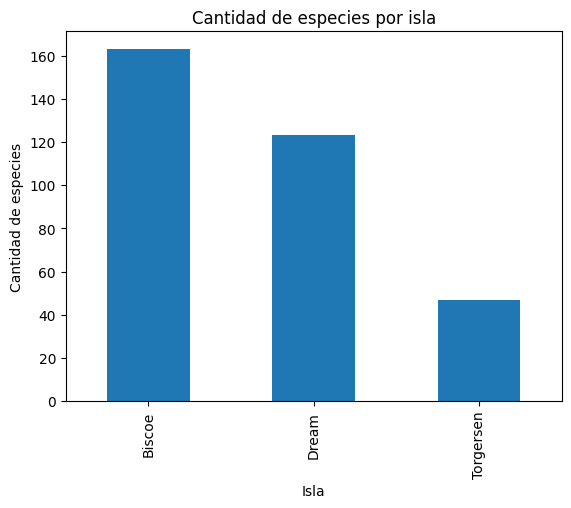

In [75]:
df_copy.groupby('island')['species'].count().plot(kind='bar', title='Cantidad de especies por isla', xlabel='Isla', ylabel='Cantidad de especies')

Desde el gráfico sí se puede observar un desbalance, hay un peso mayor hacia la isla Biscoe, dando como resultado una tendencia hacia la izquierda.

4. Repita la pregunta anterior observando las especies

In [76]:
df_copy.groupby('species')['island'].count()

species
Adelie       146
Chinstrap     68
Gentoo       119
Name: island, dtype: int64

<Axes: title={'center': 'Cantidad de especies por isla'}, xlabel='Isla', ylabel='Cantidad de especies'>

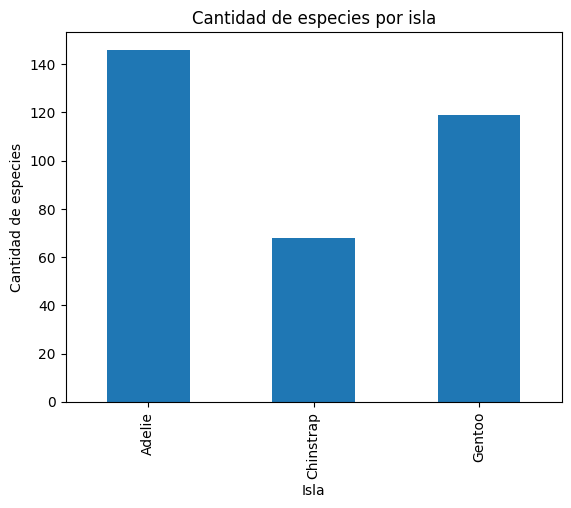

In [77]:
df_copy.groupby('species')['island'].count().plot(kind='bar', title='Cantidad de especies por isla', xlabel='Isla', ylabel='Cantidad de especies')

Así, según lo anterior, la especie de pingüino con mayor cantidad es Adelie. Así mismo, se presenta nuevamente el desbalance, porque a comparación de las otras especies Chinstrap tiene menor peso.

### Tendencias y visualización de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

La longitud promedio y la desviación estándar por especie es:

In [78]:
bill_length_stats = df_copy.groupby(['species'])['bill_length_mm'].agg(['mean', 'std'])
bill_length_stats

,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [79]:
idx_ = df_copy['bill_length_mm'].idxmax() # Extrae el índice del valor máximo de la columna 'bill_length_mm'
max_bill_length = df_copy.loc[idx_, 'bill_length_mm'] # Obtiene el valor máximo de la columna 'bill_length_mm' usando el índice extraído
max_bill_length_species = df_copy.loc[idx_, 'species'] # Obtiene la especie correspondiente al valor máximo
print(f"La especie con el pico más largo es {max_bill_length_species}, con una longitud de {max_bill_length} mm.")

La especie con el pico más largo es Gentoo, con una longitud de 59.6 mm.


7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

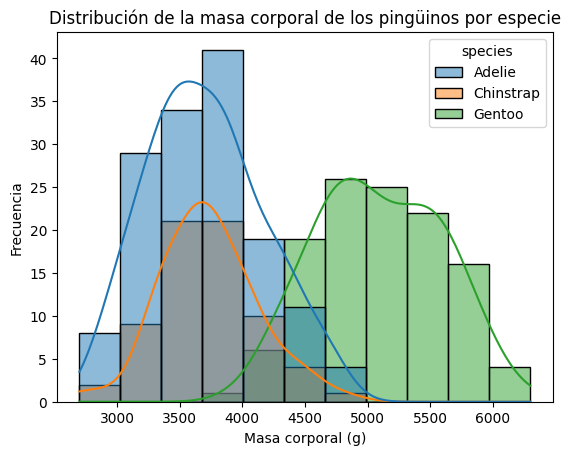

In [80]:
sns.histplot(data=df_copy, x='body_mass_g', hue='species', kde=True)
plt.title('Distribución de la masa corporal de los pingüinos por especie')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.show()

La tendencia de las especies Adelie y Chinstrap podría ser una distribución normal, sin embargo, se debe realizar una prueba de Hipótesis. En cuanto a la especie Gentoo, la distribución no es clara, pues de forma visual tiene dos valores máximos y su distribución de distribuye alrededor de estos valores.

8. Describa la distribucion con ayuda de la media, desviacion estandard

In [81]:
df_body_mass = df_copy.groupby([ 'species'])['body_mass_g'].agg(['mean', 'std']) # Agrupa por isla y especie, y calcula la media y desviación estándar de la masa corporal
df_body_mass

,mean,std
species,,
Adelie,3706.164384,458.620135
Chinstrap,3733.088235,384.335081
Gentoo,5092.436975,501.476154


Lo que se puede observar es que, para las especies Adelie y Chinstrap las distribuciones estarán superpuestas una encima de otra, pues su valor central, se encuentran muy cercanos. Por otro lado, la especie Gentoo, se cuencuentra en una media muy atípica respecto a las demás especies, mostrando que los pingüinos de esta especie son más masivos, en promedio.

9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?


In [82]:
sex_ = df_copy.groupby(['sex'])['body_mass_g'].agg(['mean', 'std']) # Agrupa por sexo; calcula la media y desviación estándar de la masa corporal
display(sex_)
diff = sex_.loc['Male', ['mean','std']] - sex_.loc['Female', ['mean', 'std']] # Calcula la diferencia entre la media de masa corporal de machos y hembras
display(diff) # Muestra la diferencia entre la media de masa corporal de machos y hembras


,mean,std
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884


mean    683.411797
std     121.456835
dtype: float64

La diferencia de la masa corporal promedio entre los machos y las hembras es: 683.411 g, mientras que para la desviación estándar es: 121.45g

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [83]:
df_flipper = df_copy.groupby(['species'])['flipper_length_mm'].agg(['mean', 'std']) # Agrupa por especie, calcula la media y desviación estándar de la longitud de aleta
df_flipper

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


Desde la tabla inmediatamente anterior, estas distribuciones estarán levemente superpuestas, ya que los valores promedio se encuentran muy cercanos, además, el valor de la desviación estándar son cercanos, por lo que una estará superpuesta a las demás

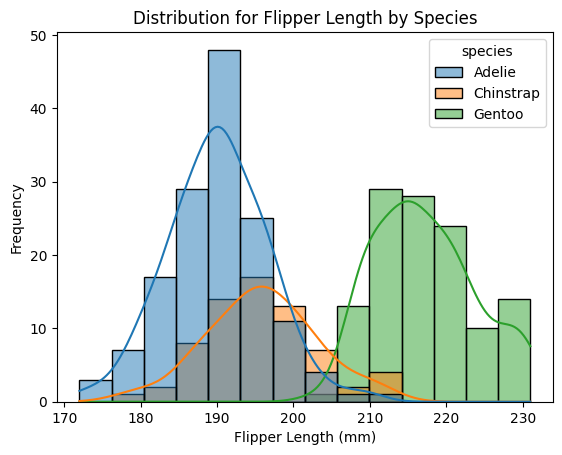

In [84]:
sns.histplot(data=df_copy, x='flipper_length_mm', hue='species', kde=True, bins=14)
plt.title('Distribution for Flipper Length by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [85]:
flipper_values = df_copy['flipper_length_mm']
print(f'El valor máximo de la longitud de la aleta es: {float(flipper_values.max())} mm')
print(f'El valor mínimo de la longitud de la aleta es: {float(flipper_values.min())} mm')

El valor máximo de la longitud de la aleta es: 231.0 mm
El valor mínimo de la longitud de la aleta es: 172.0 mm


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [86]:
length =df_copy.groupby(['species', 'island'])['bill_length_mm'].mean() # Agrupa por isla y especie, calcula la media de la longitud del pico 
display(length)

species    island   
Adelie     Biscoe       38.975000
           Dream        38.520000
           Torgersen    39.038298
Chinstrap  Dream        48.833824
Gentoo     Biscoe       47.568067
Name: bill_length_mm, dtype: float64

Lo que se puede analizar es:
- De la especie Adelie, en cada una de las islas las variaciones son imperceptibles.
- De las demás especie solo están presente en una isla, por lo que no hay forma de establecer un cambio.

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [87]:
var = df_copy.groupby(['island','species' ])['bill_length_mm'].var() # Agrupa por isla y especie, calcula la varianza de la longitud del pico
display(var)

island     species  
Biscoe     Adelie        6.154942
           Gentoo        9.647955
Dream      Adelie        6.171630
           Chinstrap    11.150630
Torgersen  Adelie        9.169371
Name: bill_length_mm, dtype: float64

Lo que se puede concluir es que la isla con mayor variación en la longitud del pico entre las especies es: Dream en la especie Chinstrap, Torgersen para la especie Adelie y Biscoe para la Gentoo.

### Relación entre características de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

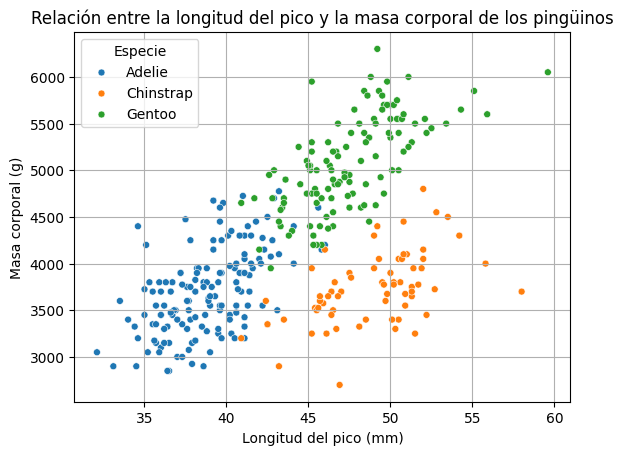

In [88]:
sns.scatterplot(data=df_copy, x = 'bill_length_mm', y = 'body_mass_g', hue='species', s=25)
plt.title('Relación entre la longitud del pico y la masa corporal de los pingüinos')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Especie')
plt.grid()
plt.show()

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?



In [89]:
import numpy as np
from scipy.stats import pearsonr

# Columnas:

cols = df_copy.columns.tolist()
print(cols)

# Función para calcular los estadísticos de Pearson:

def pearson_stats1(group):
    x = group['bill_length_mm'].values
    y = group['body_mass_g'].values
    r, p = pearsonr(x, y)
    cov = np.cov(x, y)[0][1]
    return pd.Series({'r': r, 'p-value': p, 'covariance': cov})
stats1 = df_copy.groupby('species').apply(pearson_stats1)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


/var/folders/1_/65tnlgjn3mbg11m5sr_t4q900000gn/T/ipykernel_46488/2692206088.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats1 = df_copy.groupby('species').apply(pearson_stats1)


In [90]:
stats1

,r,p-value,covariance
species,,,
Adelie,0.544276,1.241918e-12,664.627067
Chinstrap,0.513638,7.480492e-06,659.199956
Gentoo,0.666730,1.262418e-16,1038.527631


- Un valor de $r$ entre 0.5 y 0.7 indica una correlación moderada-fuerte positiva, por lo que Gentoo, muestra la asociación más fuerte entre la longitud del pico y la masa. Adelie y Chinstrap están algo por debajo, pero también es una correlación positiva.

- La hipótesis nula $r = 0$, se rechaza, por lo que hay correlación.

- La covarianza es positiva en todas las especies, lo que confirma la relación directa.

Por lo tanto se puede concluir lo siguiente:

Sí existe una correlación significativa entre la longitud de pico y la masa corporal en las tres especies. Es más intensa en Gentoo, luego Adelie y por último Chinstrap. Como la covarianza es mayor en Gentoo, esto refuerza la idea de que en esta especie la masa y el pico varían en cojunto con mayor dispersión.


16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

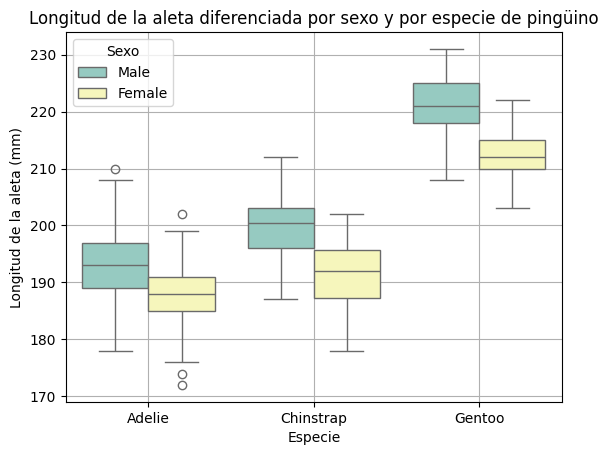

In [91]:
sns.boxplot(data=df_copy, x='species', y='flipper_length_mm', hue='sex', palette='Set3')
plt.title('Longitud de la aleta diferenciada por sexo y por especie de pingüino')
plt.xlabel('Especie')
plt.ylabel('Longitud de la aleta (mm)')
plt.legend(title='Sexo')
plt.grid()
plt.show()

En todas las especies se observa la misma tendencia: los machos presentas aletas más largas, con una dispersión similar unos a otros, mientras que las hembras tienen valores típicos más bajos, con ciertos valores atípicos en longitud muy pequeñas. Por lo que podemos asociar de forma consistente que el sexo tiene una relación directa con la longitud de las aletas en las tres especies.

### Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones

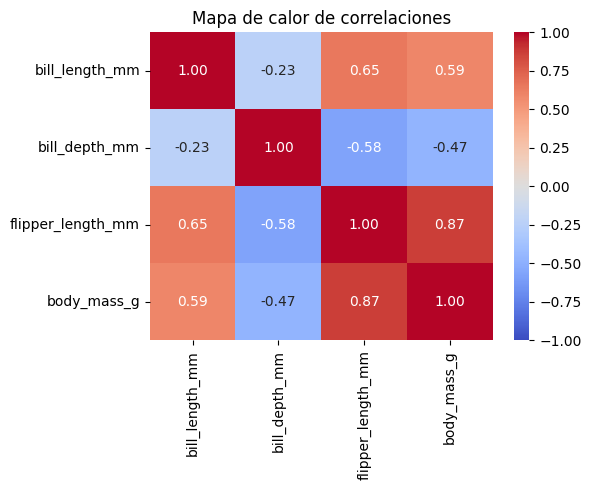

In [92]:
# 1) Seleccionamos sólo las columnas numéricas de interés
df2 = df_copy[['bill_length_mm','bill_depth_mm',
               'flipper_length_mm','body_mass_g']]

# 2) Calculamos la matriz de correlación de Pearson
corr = df2.corr()

# 3) Dibujamos el heatmap
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,         # muestra los valores numéricos
    fmt=".2f",          # formato con dos decimales
    cmap="coolwarm",    # paleta de color
    vmin=-1, vmax=1     # escala de -1 a 1
)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

Según el mapa de calor de correlaciones, hay una fuerte correlación entre la longitud de la aleta y la masa corporal, por lo tanto, escogemos estas dos variables, pero para la especie Chinstrap.

La hipótesis nula es: sí existe una correlación entre la longitud de los picos con la masa corporal para la especie Chinstrap.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, t

# 1) Filtrar Chinstrap
mask = df_copy['species'] == 'Chinstrap'
df_chin = df_copy[mask]

# 2) Extraer las dos series
x = df_chin['bill_length_mm']
y = df_chin['body_mass_g']
n = len(x)

# 3) Coeficiente y p‐value de Pearson
r, pval = pearsonr(x, y)  
r2 = r ** 2  # 

# 4) Estadístico t manual
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r2)

# 5) p‐value manual (dos colas)
pval_manual = 2 * (1 - t.cdf(abs(t_stat), df=n-2))

print(f"Chinstrap: n={n}")
print(f"r = {r:.3f}")
print(f"p‐value (pearsonr) = {pval:.3e}")
print(f"t = {t_stat:.3f}  (gl={n-2})")
print(f"p‐value (manual) = {pval_manual:.3e}")

Chinstrap: n=68
r = 0.514
p‐value (pearsonr) = 7.480e-06
t = 4.863  (gl=66)
p‐value (manual) = 7.480e-06


Dado que p-value es menor a alpha, se rechaza la hipótesis nula.